# Responsi Biomedical Image Processing
### Sayyidan Muhamad Ikhsan
### 20/460160/TK/50749

# Image Filtering pada citra paru-paru X-Ray

In [ ]:
# mengkoneksikan pada google drive
from google.colab import files
import cv2
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
from skimage.metrics import structural_similarity as ssim

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
#inisiasi path image
covid1 = "/content/drive/MyDrive/SP Image Processing/Responsi Filtering/COVID-19 (101).jpg"
covid2 = "/content/drive/MyDrive/SP Image Processing/Responsi Filtering/COVID-19 (106).jpg"
normal = "/content/drive/MyDrive/SP Image Processing/Responsi Filtering/Normal (1010).jpg"
pneumonia_bakteri = "/content/drive/MyDrive/SP Image Processing/Responsi Filtering/Pneumonia-Bacterial (1009).jpg"
pneumonia_viral = "/content/drive/MyDrive/SP Image Processing/Responsi Filtering/Pneumonia-Viral (1029).jpg"

## Average Filter

In [ ]:
#fungsi untuk melakukan konvolusi
def convolution2d(image, kernel):
    m, n = kernel.shape
    if (m == n):
        y, x = image.shape
        y = y - m + 1
        x = x - m + 1
        new_image_conv = np.zeros((y,x))
        for i in range(y):
            for j in range(x):
                new_image_conv[i][j] = np.sum(image[i:i+m, j:j+m]*kernel)
        return new_image_conv


In [ ]:
# Inisiasi kernel 3x3 average filter
kernel_af = np.ones([3,3], dtype = int)/9

# Inisiasi kernel 3x3 weighted average filter
kernel_waf = np.array([[1,2,1],[2,4,2],[1,2,1]], dtype = int)/16

# Fungsi untuk melakukan konvolusi dan menampilkan hasilnya
def average_filter(input_img):
  # Baca citra yang sudah diunggah pada sistem
  img = cv2.imread(input_img, 0)
  shape = img.shape

  af_img = convolution2d(img,kernel_af)
  waf_img = convolution2d(img,kernel_waf)

  #tampilkan citra
  fig, ax = plt.subplots(1,3, figsize=(30,30))
  ax[0].set_title(f'Citra Original', fontsize = 20)
  ax[0].imshow(abs(img), cmap='gray')

  ax[1].set_title(f'Average Filter', fontsize = 20)
  ax[1].imshow(abs(af_img), cmap='gray')

  ax[2].set_title(f'Weighted Average Filter', fontsize = 20)
  ax[2].imshow(abs(waf_img), cmap='gray');

  #melihat metrik SSIM
  ssim_avg_filter = ssim(cv2.resize(img,shape), cv2.resize(af_img,shape), multichannel=True)
  ssim_weighted_avg = ssim(cv2.resize(img,shape), cv2.resize(waf_img,shape), multichannel=True)

  print("nilai SSIM average filter:" + str(ssim_avg_filter))
  print("nilai SSIM weighted filter:" + str(ssim_weighted_avg))

<ipython-input-31-e8e63f54446b>:28: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_avg_filter = ssim(cv2.resize(img,shape), cv2.resize(af_img,shape), multichannel=True)
/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:348: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  return func(*args, **kwargs)
<ipython-input-31-e8e63f54446b>:29: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_weighted_avg = ssim(cv2.resize(img,shape), cv2.resize(waf_img,shape), multichannel=True)


nilai SSIM average filter:0.9258160156363217
nilai SSIM weighted filter:0.9321666017140666
nilai SSIM average filter:0.8866094136961978
nilai SSIM weighted filter:0.895060427898587
nilai SSIM average filter:0.9449812069191302
nilai SSIM weighted filter:0.9497158605661056
nilai SSIM average filter:0.9547976232979388
nilai SSIM weighted filter:0.957852000907522
nilai SSIM average filter:0.9676371964335527
nilai SSIM weighted filter:0.969971225600706


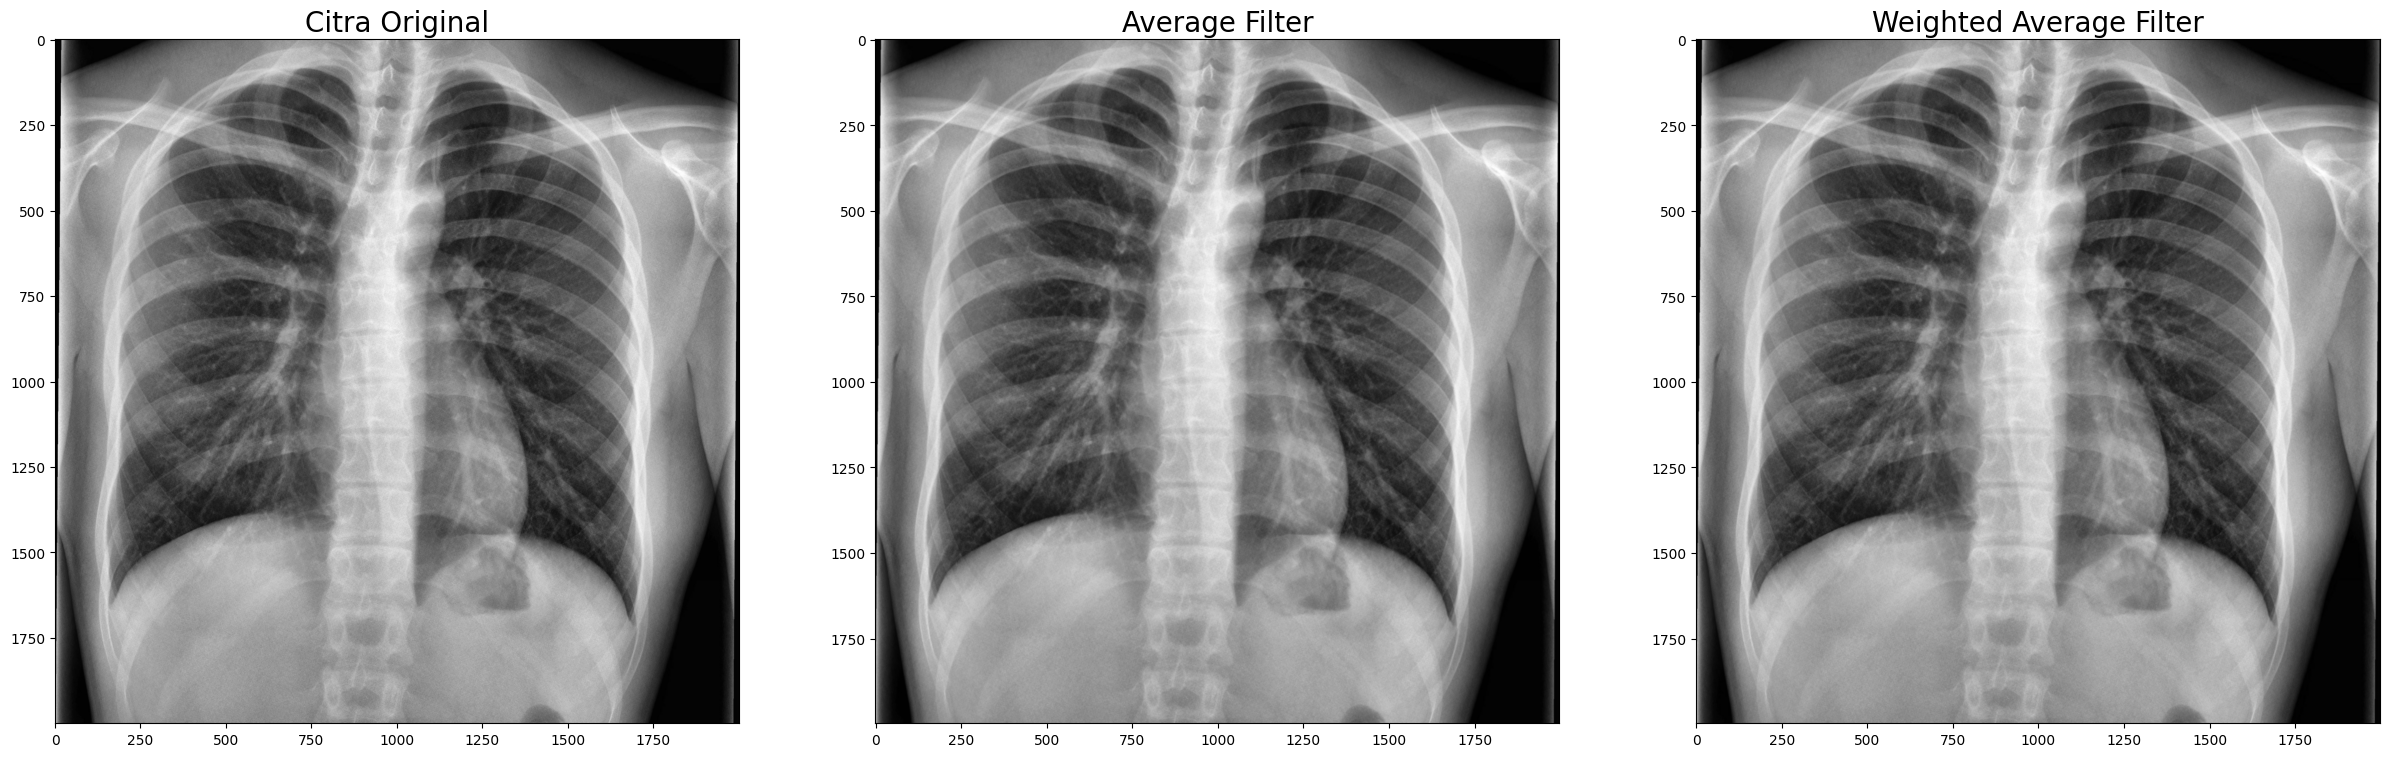

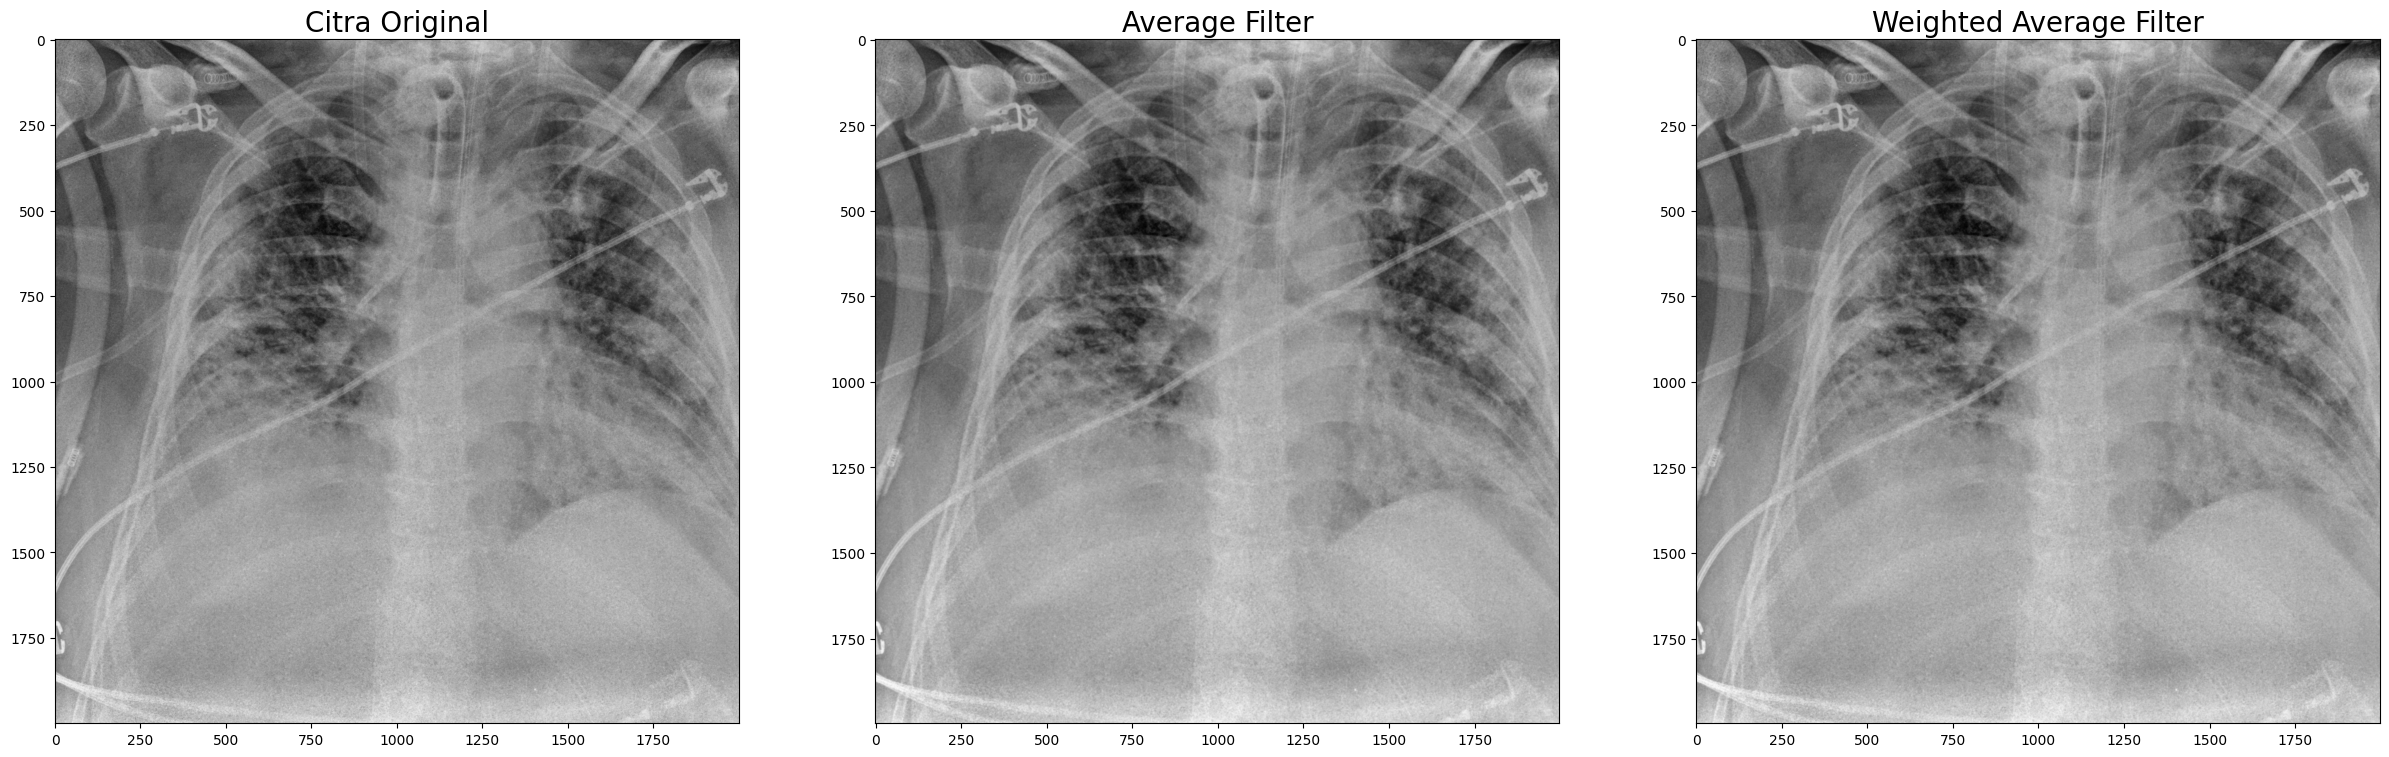

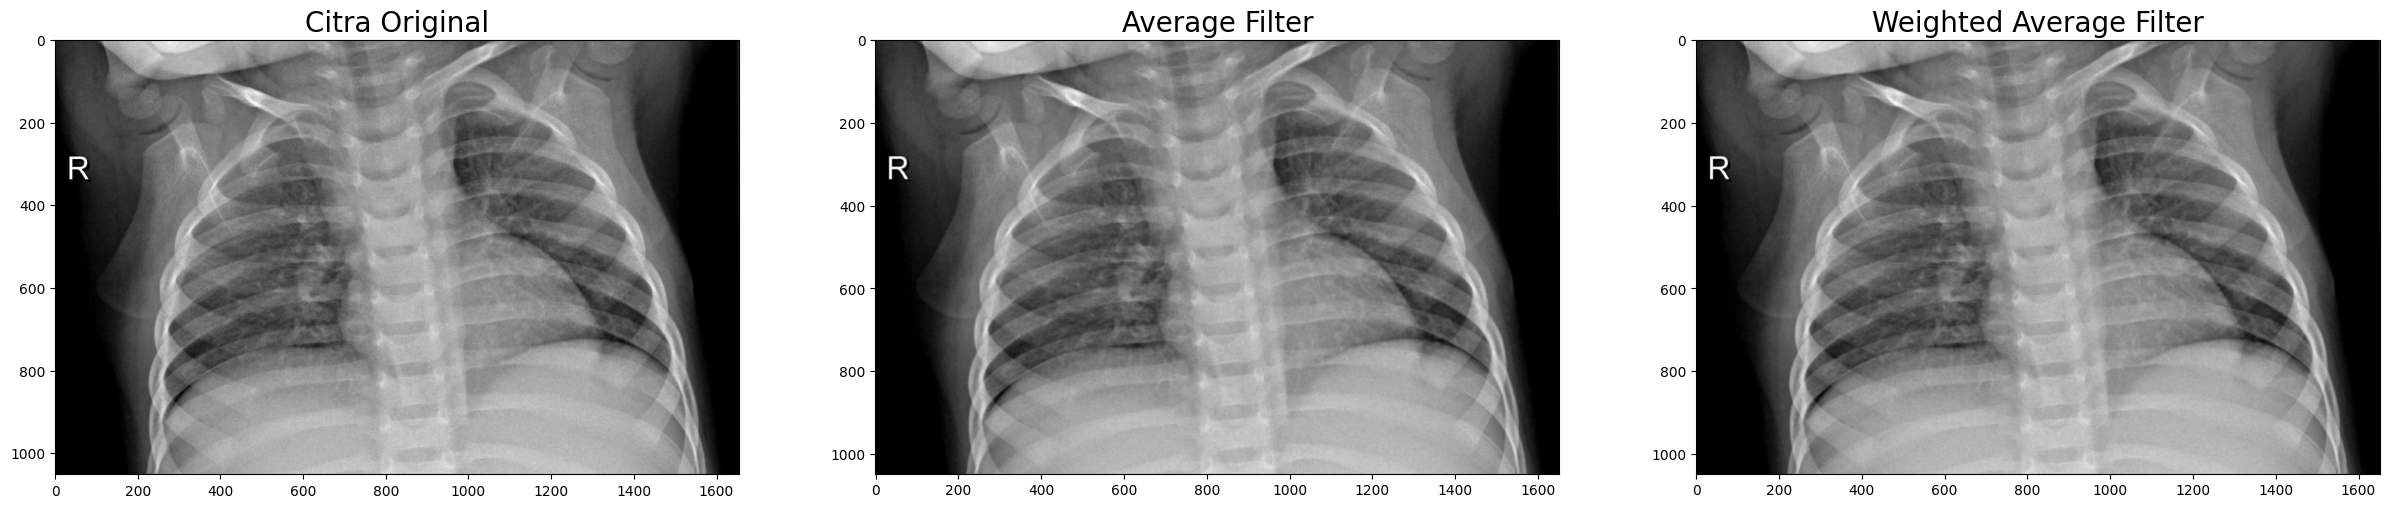

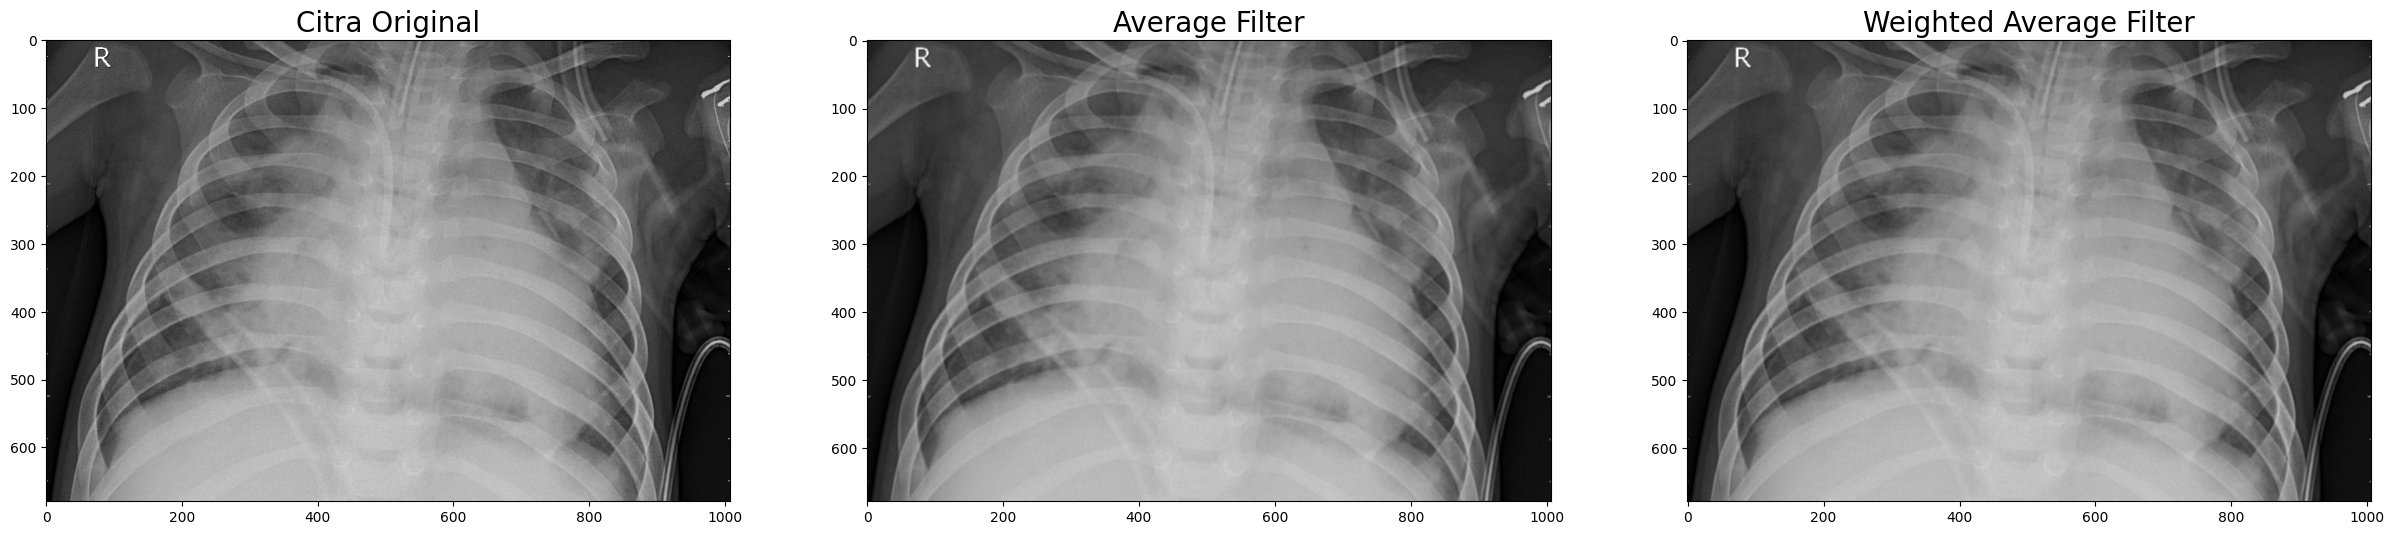

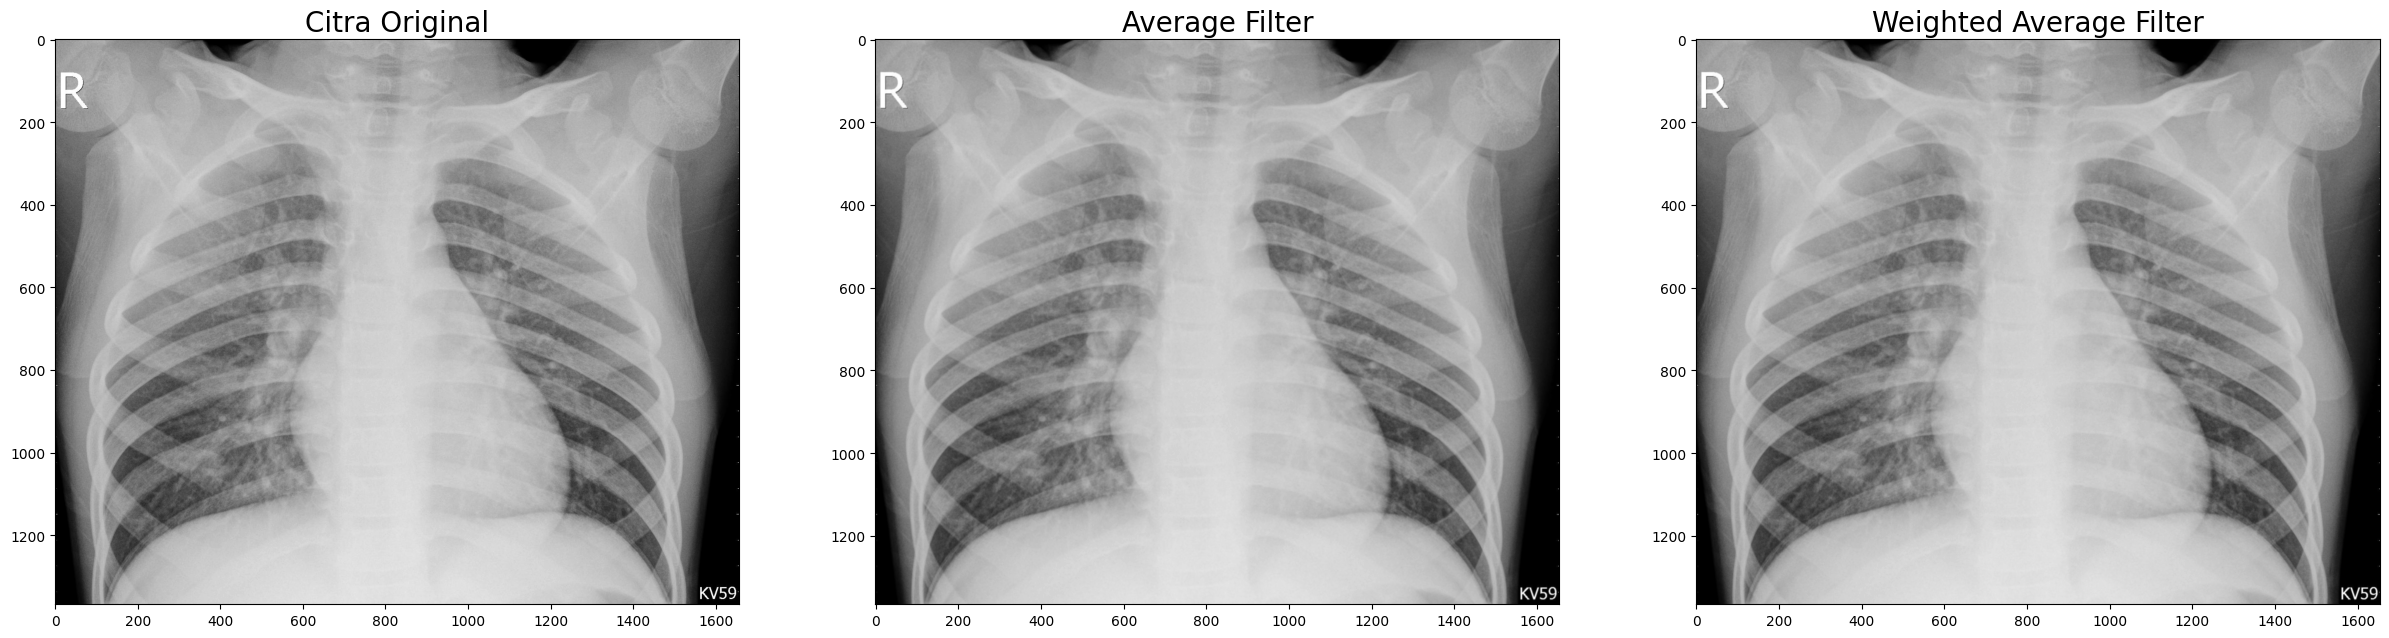

In [ ]:
average_filter(covid1)
average_filter(covid2)
average_filter(normal)
average_filter(pneumonia_bakteri)
average_filter(pneumonia_viral)

## Median Filter

In [ ]:
#fungsi untuk menggunakan median filter dengan ukuran kernel 3x3
def medianFilter(input_image):
  img = cv2.imread(input_image, 0)
  w,h = img.shape
  k = 3
  size = k // 2

  # Buat output image dengan nilai awal nol dan lakukan padding
  _img = np.zeros((w+2*size,h+2*size), dtype=float)
  _img[size:size+w,size:size+h] = img.copy().astype(float)
  dst = _img.copy()

  # Proses filtering
  for x in range(w):
    for y in range(h):
        dst[x+size,y+size] = np.median(_img[x:x+k,y:y+k])

  dst = dst[size:size+w,size:size+h].astype(np.uint8)
  return dst

In [ ]:
# Tampilkan citra hasil Median Filter
img_new = medianFilter(covid1)
img_new = img_new.astype(np.uint8)
cv2_imshow(img_new)

#Menampilkan nilai SSIM
ssim_median_filter = ssim(covid1, img_new, multichannel=True)
print("Nilai SSIM median filter"+str(ssim_median_filter))

In [ ]:
# Tampilkan citra hasil Median Filter
img_new2 = medianFilter(covid2)
img_new2 = img_new2.astype(np.uint8)
cv2_imshow(img_new2)

#Menampilkan nilai SSIM
ssim_median_filter = ssim(covid2, img_new3, multichannel=True)
print("Nilai SSIM median filter"+str(ssim_median_filter))

In [ ]:
# Tampilkan citra hasil Median Filter
img_new3 = medianFilter(normal)
img_new3 = img_new3.astype(np.uint8)
cv2_imshow(img_new3)

#Menampilkan nilai SSIM
ssim_median_filter = ssim(normal, img_new3, multichannel=True)
print("Nilai SSIM median filter"+str(ssim_median_filter))

In [ ]:
# Tampilkan citra hasil Median Filter
img_new4 = medianFilter(pneumonia_bakteri)
img_new4 = img_new4.astype(np.uint8)
cv2_imshow(img_new4)

#Menampilkan nilai SSIM
ssim_median_filter = ssim(pneumonia_bakteri, img_new4, multichannel=True)
print("Nilai SSIM median filter"+str(ssim_median_filter))

In [ ]:
# Tampilkan citra hasil Median Filter
img_new5 = medianFilter(pneumonia_viral)
img_new5 = img_new5.astype(np.uint8)
cv2_imshow(img_new5)

#Menampilkan nilai SSIM
ssim_median_filter = ssim(pneumonia_viral, img_new5, multichannel=True)
print("Nilai SSIM median filter"+str(ssim_median_filter))